<a href="https://colab.research.google.com/github/sammysam03/Iris_data/blob/main/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
dataset :  (150, 5)
x :  (150, 4)
y :  (150,)
(105, 4) (105, 3)
(45, 4) (45, 3)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      0.92      0.89        13
           2       0.95      1.00      0.97        19

   micro avg       0.94      0.98      0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.94      0.98      0.96        45
 samples avg       0.96      0.98      0.96        45

[[13  0  0]
 [ 0 12  1]
 [ 0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


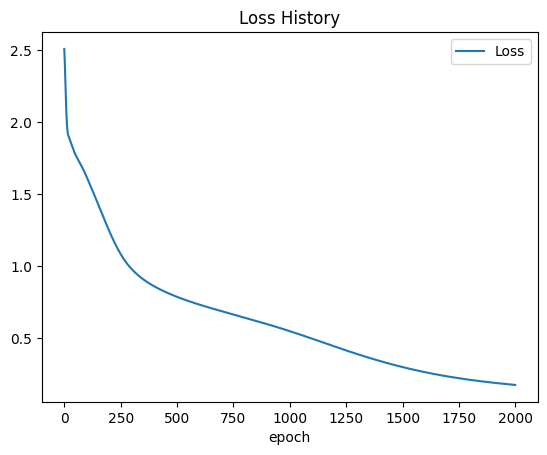

In [1]:
import pandas as pd #Python Data Analysis Library
import numpy as np #Python Scientific Library
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

dataset.head(6)
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

#Selective import Scikit Learn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01,                     solver='sgd', random_state=121)

#train our model
h=Model.fit(x_train,y_train)

#use our model to predict
y_pred=Model.predict(x_test)

#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

import matplotlib.pyplot as plt
plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])